In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

E:\anaconda3\envs\mytfenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
x=torch.linspace(0,799,800)

In [13]:
y=torch.sin(x*2*3.1416/40)

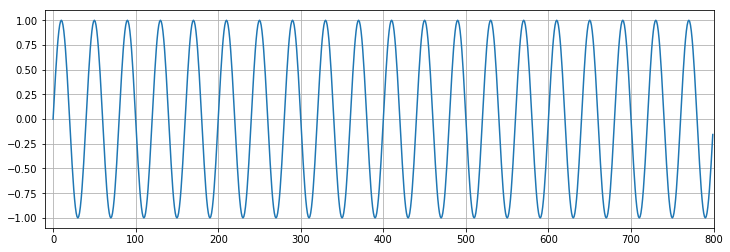

In [15]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())

In [16]:
batch_size=800
test_size=40
train_set=y[:batch_size-test_size]
test_set=y[batch_size-test_size:]

In [17]:
train_set.size()

torch.Size([760])

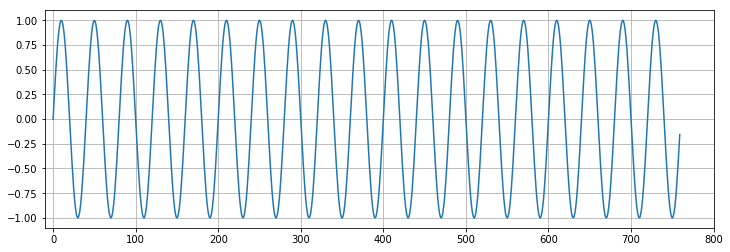

In [18]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(train_set.numpy())

In [44]:
def train_batch(train_set,w):
    out=[]
    l=len(train_set)
    for i in range(l-w):
        train_data=train_set[i:i+w]
        test_set=train_set[i+w:i+w+1]
        
        out.append((train_data,test_set))
    return out

In [45]:
w=40
train_loader=train_batch(train_set,w)

In [50]:
for train,test in train_loader:
    break

In [57]:
train

tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
         7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
         1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
         7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
        -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
        -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
        -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
        -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01])

In [63]:
##LSTM model
train.view(len(train),1,-1).size()

torch.Size([40, 1, 1])

In [55]:
torch.zeros(1,1,30)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]]])

In [79]:
class LSTM(nn.Module):
    def __init__(self,input=1,hidden=50,output=1):
        super().__init__()
        self.hidden_size=hidden
        self.lstm=nn.LSTM(input,hidden)
        self.linear=nn.Linear(hidden,output)
        self.hidden=(torch.zeros(1,1,hidden),torch.zeros(1,1,hidden))
        
    def forward(self,seq):
        lstm_out,self.hidden=self.lstm(seq.view(len(seq),1,-1),self.hidden)
        pred=self.linear(lstm_out.view(len(lstm_out),-1))
        return pred[-1]

In [80]:
torch.manual_seed(42)
model=LSTM()
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [81]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [82]:
for p in model.parameters():
    print(p.numel())

200
10000
200
200
50
1


In [94]:
torch.FloatTensor(train_set[720:].tolist())

tensor([ 2.5969e-04,  1.5669e-01,  3.0927e-01,  4.5422e-01,  5.8800e-01,
         7.0729e-01,  8.0917e-01,  8.9113e-01,  9.5114e-01,  9.8773e-01,
         1.0000e+00,  9.8765e-01,  9.5097e-01,  8.9089e-01,  8.0886e-01,
         7.0692e-01,  5.8757e-01,  4.5375e-01,  3.0877e-01,  1.5617e-01,
        -2.6859e-04, -1.5670e-01, -3.0928e-01, -4.5423e-01, -5.8800e-01,
        -7.0730e-01, -8.0918e-01, -8.9113e-01, -9.5114e-01, -9.8773e-01,
        -1.0000e+00, -9.8765e-01, -9.5097e-01, -8.9088e-01, -8.0886e-01,
        -7.0691e-01, -5.8756e-01, -4.5374e-01, -3.0876e-01, -1.5616e-01])

epoch:0 loss:0.00013148787547834218
loss on test set:0.006012174766510725


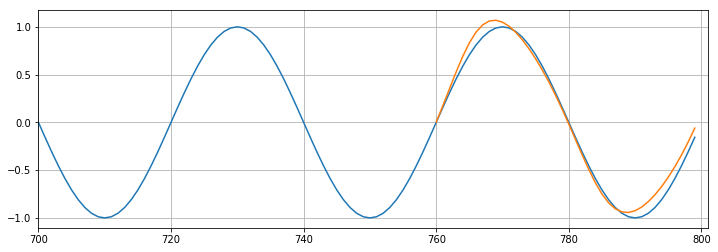

epoch:1 loss:0.000127681196318008
loss on test set:0.005497115198522806


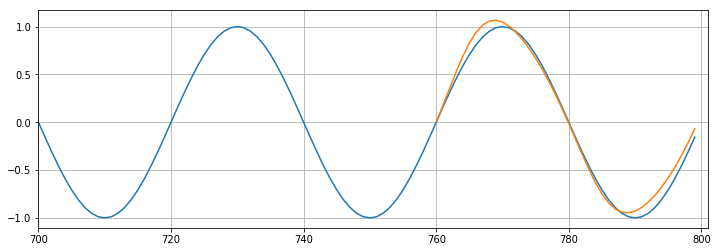

epoch:2 loss:0.0001231853966601193
loss on test set:0.005062646232545376


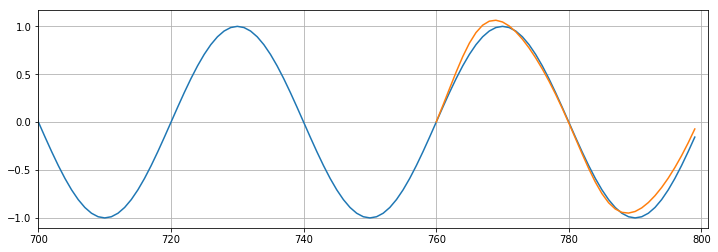

epoch:3 loss:0.00011827311391243711
loss on test set:0.004693350754678249


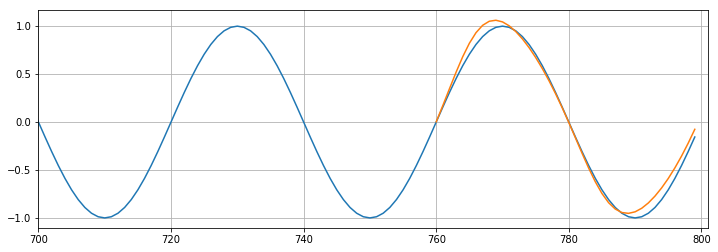

epoch:4 loss:0.00011314482253510505
loss on test set:0.004377045203000307


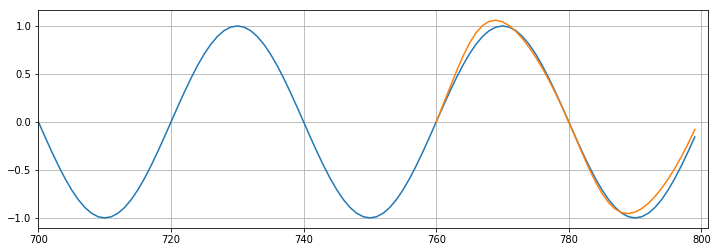

epoch:5 loss:0.00010795578418765217
loss on test set:0.0041045090183615685


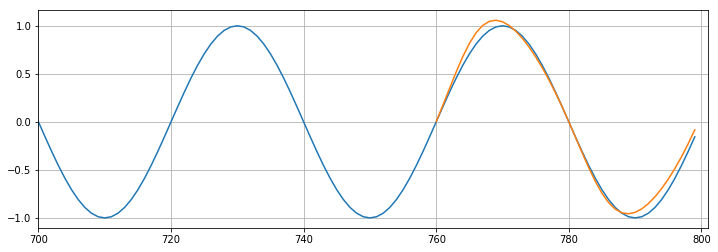

epoch:6 loss:0.00010281480354024097
loss on test set:0.0038679856806993484


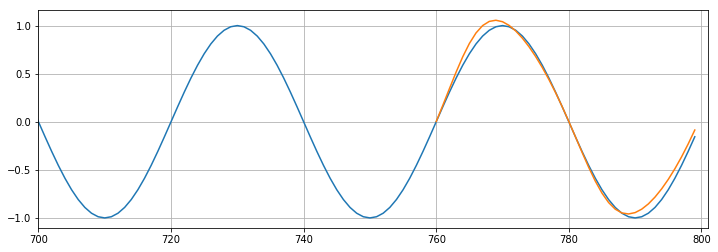

epoch:7 loss:9.779657557373866e-05
loss on test set:0.003661656053736806


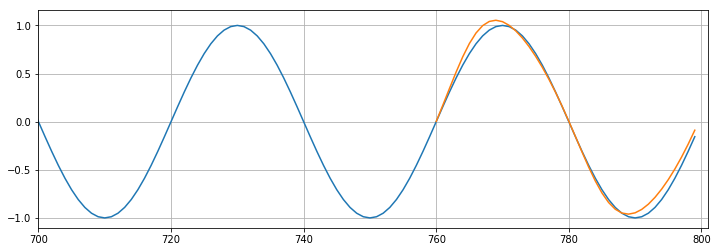

epoch:8 loss:9.295475319959223e-05
loss on test set:0.0034805741161108017


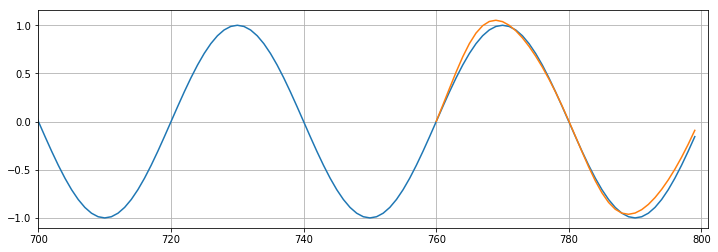

epoch:9 loss:8.831789455143735e-05
loss on test set:0.0033207430969923735


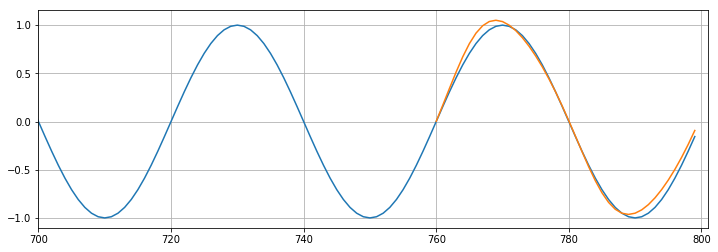

In [99]:
epochs=10
window=40

for i in range(epochs):
    for x_train,y_train in train_loader:
        optimizer.zero_grad()
        
        model.hidden=(torch.zeros(1,1,model.hidden_size),
                     torch.zeros(1,1,model.hidden_size))
        
        y_pred=model.forward(x_train)
        loss=criterion(y_pred,y_train)
        
        loss.backward()
        optimizer.step()
        
    print(f'epoch:{i} loss:{loss.item()}')
    
    pred=train_set[-window:].tolist()
    
    for i in range(40):
        seq=torch.FloatTensor(pred[-window:])
        with torch.no_grad():
            model.hidden=(torch.zeros(1,1,model.hidden_size),
                         torch.zeros(1,1,model.hidden_size))
            pred.append(model.forward(seq))
    loss=criterion(torch.FloatTensor(pred[-window:]),y[760:])
    print(f'loss on test set:{loss}')
    
    
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),pred[-window:])
    plt.show()

In [100]:
all_data=train_batch(y,40)

In [103]:
len(all_data)

760

In [104]:
import time
start_time = time.time()

for i in range(epochs):
    
    # tuple-unpack the entire set of data
    for seq, y_train in all_data:  
       
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.00008365
Epoch:  2 Loss: 0.00007927
Epoch:  3 Loss: 0.00007515
Epoch:  4 Loss: 0.00007129
Epoch:  5 Loss: 0.00006767
Epoch:  6 Loss: 0.00006430
Epoch:  7 Loss: 0.00006114
Epoch:  8 Loss: 0.00005820
Epoch:  9 Loss: 0.00005546
Epoch: 10 Loss: 0.00005289

Duration: 183 seconds


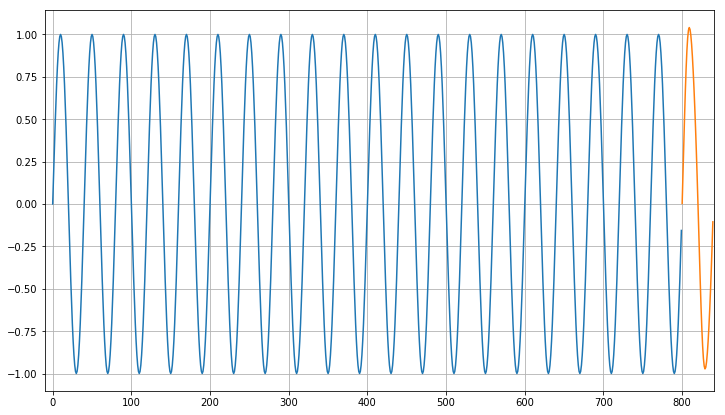

In [106]:
window=40
preds=y[-window:].tolist()

for i in range(40):
    seq=torch.FloatTensor(preds[-window:])
    with torch.no_grad():
        model.hidden=(torch.zeros(1,1,model.hidden_size),
                     torch.zeros(1,1,model.hidden_size))
        preds.append(model.forward(seq).item())
        
plt.figure(figsize=(12,7))
plt.xlim(-10,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,840),preds[-window:])
        
        